In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
print(x_test.shape,y_test.shape)

(10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

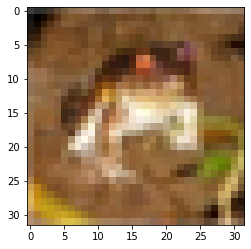

In [ ]:
plt.imshow(x_train[0])

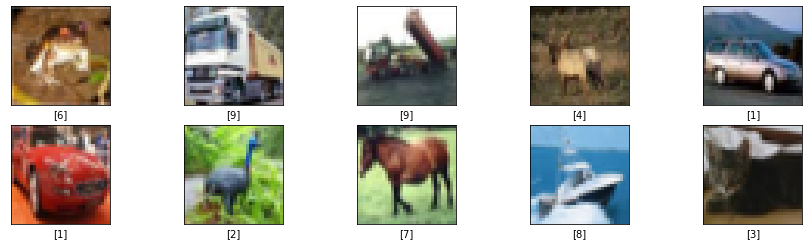

In [ ]:
plt.figure(figsize=(15,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(str(y_train[i]))
plt.show()  

In [ ]:
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)

In [ ]:
x_train[0]

array([[[0.07182773, 0.09722503, 0.15002467],
        [0.05555073, 0.08510671, 0.1680591 ],
        [0.06416572, 0.08557414, 0.15041218],
        ...,
        [0.19738931, 0.2065452 , 0.30386149],
        [0.20651145, 0.21914754, 0.33373633],
        [0.20868805, 0.22118572, 0.32022806]],

       [[0.01947871, 0.03136291, 0.04762688],
        [0.        , 0.        , 0.        ],
        [0.02309966, 0.01426236, 0.        ],
        ...,
        [0.15366383, 0.1376968 , 0.15474428],
        [0.16167672, 0.14551397, 0.16359624],
        [0.17202664, 0.15518676, 0.17721359]],

       [[0.03043548, 0.0376355 , 0.05000822],
        [0.02067004, 0.01295102, 0.        ],
        [0.0628824 , 0.04813545, 0.02798366],
        ...,
        [0.14741733, 0.13143786, 0.14067662],
        [0.16303535, 0.14726715, 0.16359624],
        [0.15369593, 0.13021418, 0.13057843]],

       ...,

       [[0.25322319, 0.26658477, 0.22860901],
        [0.25966738, 0.28307232, 0.12697798],
        [0.25409624, 0

In [ ]:
model=keras.Sequential([
                        layers.Flatten(input_shape=(32,32,3)),
                        layers.Dense(3000,activation='relu'),
                        layers.Dense(1000,activation='relu'),
                        layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=300,epochs=5)

Epoch 1/5
167/167 [==============================] - 55s 324ms/step - loss: 2.3922 - accuracy: 0.1829
Epoch 2/5
167/167 [==============================] - 55s 332ms/step - loss: 1.9401 - accuracy: 0.3028
Epoch 3/5
167/167 [==============================] - 55s 332ms/step - loss: 1.8366 - accuracy: 0.3454
Epoch 4/5
167/167 [==============================] - 60s 357ms/step - loss: 1.7794 - accuracy: 0.3702
Epoch 5/5
167/167 [==============================] - 55s 332ms/step - loss: 1.7076 - accuracy: 0.3936


In [ ]:
cnn_model=keras.Sequential([
                            layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                            layers.MaxPool2D((2,2)),

                            layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                            layers.MaxPool2D((2,2)),

                            layers.Flatten(),
                            layers.Dense(256,activation='relu'),
                            layers.Dense(128,activation='relu'),
                            layers.Dense(64,activation='relu'),
                            layers.Dense(10,activation='softmax')
])

cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.8474 - accuracy: 0.3165
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2126 - accuracy: 0.5677
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.0105 - accuracy: 0.6410
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8898 - accuracy: 0.6860
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7764 - accuracy: 0.7310
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6862 - accuracy: 0.7601
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5938 - accuracy: 0.7936
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5185 - accuracy: 0.8184
Epoch 9/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.4442 - accuracy: 0.8458
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [ ]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.1945 - accuracy: 0.6661


[1.1945085525512695, 0.666100025177002]

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               590080    
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
prediction=cnn_model.predict(x_test)

In [ ]:
np.argmax(prediction[9])

1

In [ ]:
y_test[9]

array([1], dtype=uint8)